In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
tf.random.set_seed(42)


In [ ]:
df = pd.read_csv("Preprocessed/alldata.csv")
df.head()

,factor_1,factor_2,factor_3,factor_4,factor_5,label
0,0.188667,0.2224,0.0610,0.053,0.107333,I need to take a break
1,0.160667,0.2160,0.0505,0.086,0.102000,I need to take a break
2,0.166000,0.1760,0.0685,0.066,0.155333,I need to take a break
3,0.146667,0.1372,0.0585,0.104,0.127333,I need to take a break
4,0.124000,0.1468,0.0545,0.082,0.105333,I need to take a break


In [3]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = encoder.fit_transform(df[['label']])
one_hot_df = pd.DataFrame(one_hot_labels, columns=encoder.get_feature_names_out(['label']))

df = pd.concat([df, one_hot_df], axis=1)
# df = df.drop('label', axis=1)
df = df.sample(frac=1)
df.head()

,factor_1,factor_2,factor_3,factor_4,factor_5,label,label_I don't need anything right now,label_I need an easier quesiton,label_I need feedback on my progress,label_I need reminders to stay focused,label_I need to take a break
1579,0.153333,0.0788,0.027,0.046,0.098000,I need an easier quesiton,0.0,1.0,0.0,0.0,0.0
7253,0.179333,0.1188,0.202,0.095,0.050000,I need reminders to stay focused,0.0,0.0,0.0,1.0,0.0
7317,0.122000,0.1760,0.103,0.134,0.163333,I need reminders to stay focused,0.0,0.0,0.0,1.0,0.0
2136,0.089333,0.1164,0.113,0.108,0.222000,I don't need anything right now,1.0,0.0,0.0,0.0,0.0
6358,0.228000,0.1248,0.105,0.216,0.139333,I need feedback on my progress,0.0,0.0,1.0,0.0,0.0


In [4]:
x = df.iloc[:, :5]
y = df.iloc[:, 6:]

In [5]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=df['label'], shuffle=True)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, shuffle=True) 

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(5856, 5)
(732, 5)
(732, 5)
(5856, 5)
(732, 5)
(732, 5)


In [6]:
model = Sequential([
    Dense(24, activation='relu', input_dim = (5)),
    Dense(24, activation='relu'),
    Dense(12, activation='relu'),
    Dense(y.shape[1], activation='softmax')
]) 
# loss = 0.7650273442268372, epochs 1000

model.compile(
    optimizer = 'adamw',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.summary()

/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,109 (4.33 KB)

 Trainable params: 1,109 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

themodel = model.fit(x_train, y_train, epochs=1000, batch_size=256, validation_data = (x_val, y_val))


loss, accuracy = model.evaluate(x_test, y_test)

print(accuracy)

Epoch 1/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3263 - loss: 1.5946 - val_accuracy: 0.3552 - val_loss: 1.5692
Epoch 2/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.5494 - val_accuracy: 0.3552 - val_loss: 1.5331
Epoch 3/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.5092 - val_accuracy: 0.3552 - val_loss: 1.5021
Epoch 4/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3750 - loss: 1.4790 - val_accuracy: 0.3552 - val_loss: 1.4685
Epoch 5/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3751 - loss: 1.4459 - val_accuracy: 0.3634 - val_loss: 1.4245
Epoch 6/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3860 - loss: 1.4024 - val_accuracy: 0.3989 - val_loss: 1.3727
Epoch 7/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4198 - loss: 1.3540 - val_accuracy: 0.4358 - val_loss: 1.3199
Epoch 8/1000
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4550 - loss: 1.3046 - val_accuracy: 0.

In [8]:
model.save('studentneeds.h5')

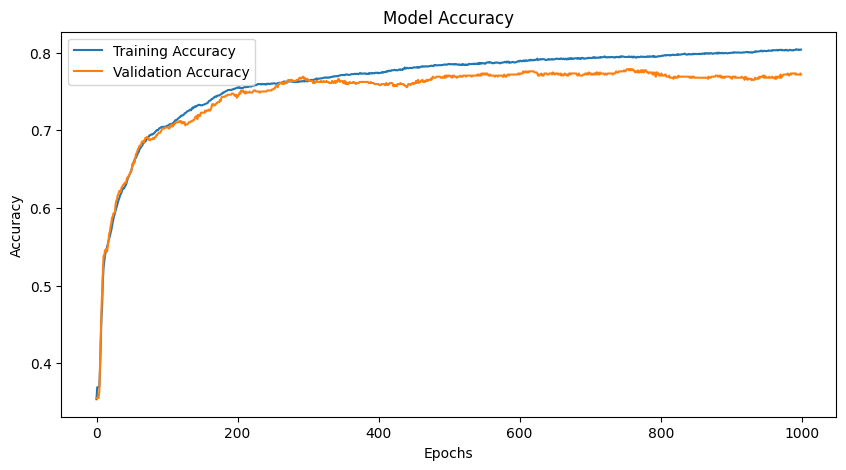

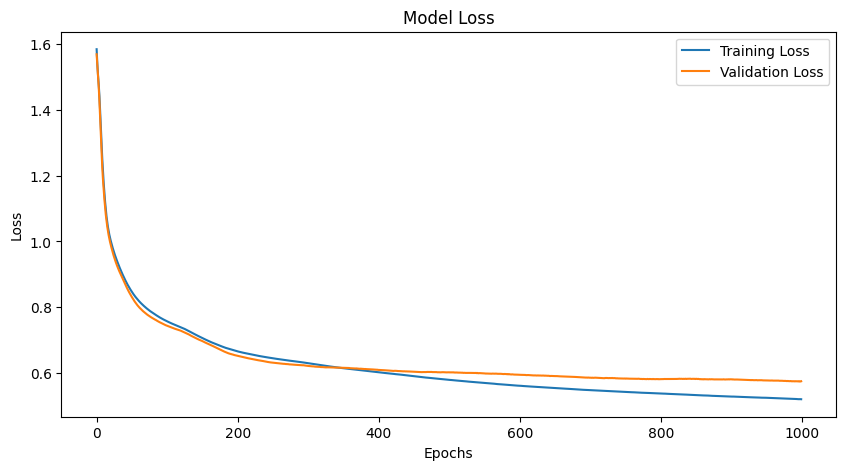

In [9]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from the history
train_accuracy = themodel.history['accuracy']
val_accuracy = themodel.history['val_accuracy']
train_loss = themodel.history['loss']
val_loss = themodel.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean F1-Score (Macro Average): 0.7725230380438294


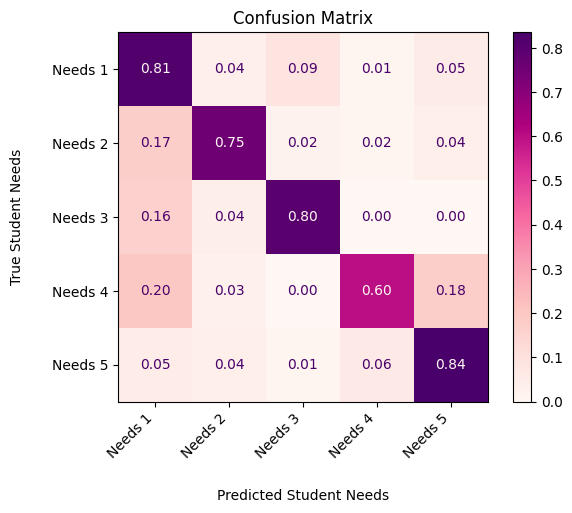

In [10]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# model = load_model("studentneeds.h5")

y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test.values, axis=1)

mean_f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Mean F1-Score (Macro Average): {mean_f1}")



cm = confusion_matrix(y_true, y_pred, normalize='all')
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

class_labels = y_test.columns

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='RdPu', xticks_rotation=45, values_format='.2f')

# new_labels = ["I don't need anything right now", "I need an easier question", "I need feedback on my progress", "I need reminders to stay focused", 'I need to take a break']
new_labels = ["Needs 1", "Needs 2", "Needs 3", "Needs 4", "Needs 5"]

plt.xticks(ticks=np.arange(len(new_labels)), labels=new_labels, ha='right')
plt.yticks(ticks=np.arange(len(new_labels)), labels=new_labels)
plt.xlabel("Predicted Student Needs", labelpad=20, loc='center')
plt.ylabel("True Student Needs", labelpad=20)
plt.title("Confusion Matrix")
plt.show()


In [11]:
report = classification_report(y_true, y_pred, output_dict=True)

print(report)

{'0': {'precision': 0.7676767676767676, 'recall': 0.8142857142857143, 'f1-score': 0.7902946273830156, 'support': 280.0}, '1': {'precision': 0.819672131147541, 'recall': 0.7518796992481203, 'f1-score': 0.7843137254901961, 'support': 133.0}, '2': {'precision': 0.8028169014084507, 'recall': 0.7972027972027972, 'f1-score': 0.8, 'support': 143.0}, '3': {'precision': 0.8529411764705882, 'recall': 0.5979381443298969, 'f1-score': 0.703030303030303, 'support': 97.0}, '4': {'precision': 0.6407766990291263, 'recall': 0.8354430379746836, 'f1-score': 0.7252747252747253, 'support': 79.0}, 'accuracy': 0.773224043715847, 'macro avg': {'precision': 0.7767767351464949, 'recall': 0.7593498786082424, 'f1-score': 0.760582676235648, 'support': 732.0}, 'weighted avg': {'precision': 0.7815920199924512, 'recall': 0.773224043715847, 'f1-score': 0.7725230380438294, 'support': 732.0}}


<h1>Cross-validation</h1>

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

def create_model(input_dim, output_dim):
    model = Sequential([
        Dense(24, activation='relu', input_dim = (5)),
        Dense(24, activation='relu'),
        Dense(12, activation='relu'),
        Dense(y.shape[1], activation='softmax')
    ]) 
    model.compile(
        optimizer = 'adamw',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    return model

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize metrics storage
f1_scores = []
accuracy_scores = []
precision_scores = []
recall_scores = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(x)):
    print(f"Fold {fold + 1}")
    x_train, x_val = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    y_val_indices = np.argmax(y_val.values, axis=1)  # Convert one-hot labels to indices
    
    # Train the model
    model = create_model(input_dim=5, output_dim=5)  # Adjust dimensions as needed
    model.fit(x_train, y_train, epochs=1000, batch_size=256, verbose=0)
    
    # Predict on the validation set
    y_val_pred_prob = model.predict(x_val)
    y_val_pred = np.argmax(y_val_pred_prob, axis=1)
    
    # Calculate metrics for the fold
    accuracy = accuracy_score(y_val_indices, y_val_pred)
    precision = precision_score(y_val_indices, y_val_pred, average='weighted')
    recall = recall_score(y_val_indices, y_val_pred, average='weighted')
    f1 = f1_score(y_val_indices, y_val_pred, average='weighted')
    
    # Store the metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    
    print(f"Fold {fold + 1}:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1 Score:  {f1:.4f}")

# Print overall averages
print("\nAverage Metrics Across Folds:")
print(f"  Accuracy:  {np.mean(accuracy_scores):.4f}")
print(f"  Precision: {np.mean(precision_scores):.4f}")
print(f"  Recall:    {np.mean(recall_scores):.4f}")
print(f"  F1 Score:  {np.mean(f1_scores):.4f}")


Fold 1


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 1:
  Accuracy:  0.7753
  Precision: 0.7844
  Recall:    0.7753
  F1 Score:  0.7731
Fold 2


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 2:
  Accuracy:  0.7807
  Precision: 0.7801
  Recall:    0.7807
  F1 Score:  0.7798
Fold 3


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step
Fold 3:
  Accuracy:  0.7999
  Precision: 0.8032
  Recall:    0.7999
  F1 Score:  0.7992
Fold 4


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 4:
  Accuracy:  0.7835
  Precision: 0.7853
  Recall:    0.7835
  F1 Score:  0.7828
Fold 5


/Users/mdaffarudiyanto/Downloads/data/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Fold 5:
  Accuracy:  0.7684
  Precision: 0.7761
  Recall:    0.7684
  F1 Score:  0.7668

Average Metrics Across Folds:
  Accuracy:  0.7816
  Precision: 0.7858
  Recall:    0.7816
  F1 Score:  0.7803
